We import the right modules

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata
import warnings
import time
from numba import jit
import loop_SE_fortran
import numpy.ma as ma
from make_SE_module import SingularityExponents
%matplotlib inline

We download the netCDF file, create a Basemap object, prepare structured arrays with lon, lat, sst (here ADT)

In [2]:
mur_file = "dataset-duacs-nrt-global-merged-allsat-phy-l4-v3_1512638118668.nc"
dte = '071217'
night_sst4 = 'yes'
# ------------------------------------------------------------------------------------

# parameters (coordinates limits, values of sst max/min) of the plot
lonmin, lonmax, latmin, latmax = 100, 180, -60, 20

M = Basemap(projection = 'cyl',llcrnrlon = lonmin,
                                   urcrnrlon = lonmax,
                                   llcrnrlat = latmin,
                                   urcrnrlat = latmax,
                                   lat_ts = 37.,
                                   resolution = 'h')


# netCDF file processing
nc = Dataset(mur_file,mode='r')
lon = nc.variables['longitude'][:]
lat = nc.variables['latitude'][:]
sla = nc.variables['sla'][:]
adt = nc.variables['adt'][:]
vgos = nc.variables['vgos'][:] #"surface_geostrophic_northward_sea_water_velocity(not absolute/not sea level as geoid)
ugos = nc.variables['ugos'][:] #surface_geostrophic_eastward_sea_water_velocity(not absolute/not sea level as geoid)

nc.close()
  
x, y, sst = lon, lat, adt

tmin, tmax = -.5, .5

We call the SingularityExponents module

In [3]:
lon1, lat1, sst1 = lon, lat, adt[0]

se = SingularityExponents(sst1)

Create a reference ADT image (in a grey colormap here)

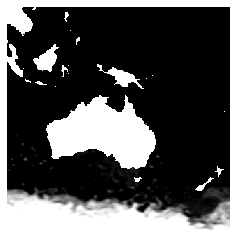

In [4]:
se._ref_image(lon1, lat1, sst1, dte, tmin, tmax, M)

Call the module that computes the Singularity Exponents values 

In [5]:
lst5 = se._compute_SE(sst1)

Plot of the values

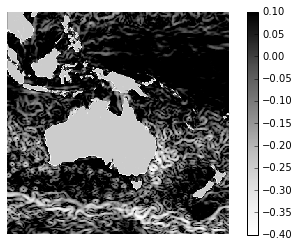

In [6]:
se._se_image(lon1, lat1, lst5, dte, M)

We try to enlight the values representing frontal areas

In [7]:
se_en = se._detect_edge(lst5)

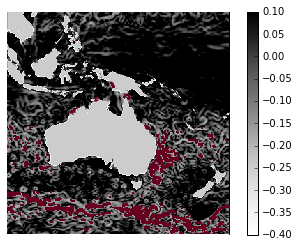

In [8]:
se._plot_edges_detected(lon1, lat1, lst5, dte, se_en, M)

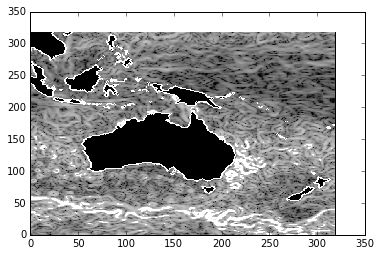

In [9]:
plt.pcolormesh(lst5, vmin=-.6, vmax=.6, cmap='Greys')

We can plot the ADT map with a different colormap and a colorscale

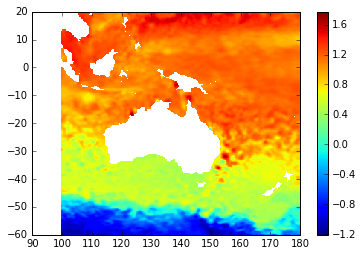

In [10]:
plt.pcolormesh(lon1, lat1, sst1, lw=0)
plt.colorbar()

As well as the computed SE from ADT

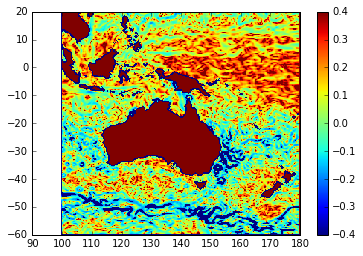

In [11]:
plt.pcolormesh(lon1, lat1, lst5, lw=0, vmin=-.4, vmax=.4)
plt.colorbar()